<a href="https://colab.research.google.com/github/mivantec/Ivantechenko_BIX_F21/blob/main/MI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

## Introduction
Q learning (reinforcement learning) explains not just how agents make decisions to get rewards but how their past decisions inform their future decisions. The reward value $Q$ update rule is below:

$$ Q \leftarrow Q + \alpha * (R - Q) $$ [1]

where \alpha is the learning rate (rate at which learning happens over time). $Q$ is trying to approximate the average reward value of each arm. 

Tradtionally, Q learning has been examined in the context of an $n$-armed bandit task. In this task, there are $n$ actions to take. Each returns a reward $R$, with some probability $p$. The reward value is either a 1 or a 0. This means the expected value of each arm is its probability of reward. Generally, there are is one optimal choice/arm that leads to rewards more often than the other arms (e.g., has higher probability of reward).

Q learning is usually examined in the context of an $n$-armed bandit task where the reward probabilities of each arm are static. That is, they remain the same throughout the simulation. The primary goal of this project is to examine Q learning in the context of a changing environment: an $n$-armed bandit task where the reward probabilities of each arm are changing. The secondary goal of this project is to compare how different agents perform in a changing environment. 

## Agents
The exploration strategies/agents are as follows:

Q learning agent 1: DeterministicActor/Critic

Q learning agent 2: EpsilonActor/Critic 

Non-Q learning agent: Random agent (used for comparisons' sake)

Review

Critic is most basic Q learning critic. It just returns the current Q value as the estimated value of each arm. Each Q learning actor uses the estimated value of each arm to decide whether to explore or exploit, additional policies vary based on the agent.

The Deterministic actor (simplest Q learning agent) always chooses the "best" arm as estimated by the Q value.

Epsilon-greedy actor picks the "best" arm $1-\epsilon$ of the time, and picks uniformly randomly from the other arms $\epsilon$ of the time. Here, $\epsilon$ = 0.2.

Random agent picks actions randomly, not dependent on Q values.

## Environment

The worlds are as follows:

Static 4-armed bandit task: reward probabilities for each arm remain the same

Sudden change 4-armed bandit: after 100 steps, the optimal arm becomes the least optimal arm

Gradual change 1 4-armed bandit: after 100 steps, the reward probability of the optimal arm begins decreasing by a set amount every time step

Gradual change 2 4-armed bandit: the reward probability of the optimal arm decreases by a set amount every time step for the first 100 steps, then switches back to its original reward probability

I am looking at different types of changing environments to try to take into account the influence of early learning in Q learning.

## Goals

The specific questions we wish to answer are as follows:

1) How does a Q learning agent perform in a changing environment compared to a static environment? Does the type of change influence its performance? Hyp: I predict that Q learning agents will perform worse in any type of changing environment than a static environment. However, I think they will perform better in the gradually changing environment than the suddenly changing environemnt.

2) Which agent will perform better in a changing environment? I predict that both Q learning agents will perform better than the random agent in each changing environment. I also predict that the Deterministic agent will perform better in the gradually changing environment than in the suddenly changing environment. However, I think that the E-greedy agent will still outperform the Deterministic agent in both changing environments.

## Sections
There are 2 sections. 

- _Section 1_ examines how each agent performs in a static environment vs. an environment with a sudden change.
- _Section 2_ examines how each agent performs in enviroments that are gradually changing.

## Metric
Our metrics of interest are the total reward acquired by each agent (since maximizing reward is the goal of RL) and the choice of arms in an experiment (only for the sudden change environment).

## The TED talk moment
In real life, an agent's environment doesn't stay the same. Rather, it is changing all around them. Understanding whether existing agents can adapt to changes in their environment is critical for developing agents that can serve as models for human behavior.  

## Install and import needed modules

In [1]:
# Install
!pip install --upgrade git+https://github.com/mivantec/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git

  Cloning https://github.com/mivantec/explorationlib to /tmp/pip-req-build-sdif00c9
  Running command git clone -q https://github.com/mivantec/explorationlib /tmp/pip-req-build-sdif00c9
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=25304 sha256=fcc86e5d3aebc7c85d3ea5989660680281921ec8580dad304368c721fcb32c68
  Stored in directory: /tmp/pip-ephem-wheel-cache-hm6zp7vh/wheels/ba/ac/15/11cb741980bda3079e70fd27f4f2332443ddbda1bad98ffb8d
Successfully built explorationlib
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-vf_ydf_s
  Running command git clone -q https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-vf_ydf_s
     |████████████████████████████████| 18.3 MB 1.2 MB/s 
  Created wheel for gym-maze: filename=gym_maze-0.4-py3-none-any.whl size=14241 sha256=b9ff5654cb7dd8711cad6c9d29eda5e4261d9ab25e77a9b053b5d59cd023ebbe
  Stored in directory: /tmp/pip-ephem-wheel-cache-tozz_v1u/wheels/01/f8/86/0dd8c448e192abff0

### Import modules
Import what _you_ need

In [2]:
# import basic modules
import shutil
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import explorationlib
import explorationlib

# import the type of environment we will be using
from explorationlib.local_gym import BanditUniform4
from explorationlib.local_gym import BanditChange4
from explorationlib.local_gym import BanditGradualChange41
from explorationlib.local_gym import BanditGradualChange42

# import the components to build our agents
from explorationlib.agent import BanditActorCritic
from explorationlib.agent import Critic
from explorationlib.agent import DeterministicActor
from explorationlib.agent import RandomActor
#from explorationlib.agent import CriticUCB
from explorationlib.agent import EpsilonActor

# import the experimental framework
from explorationlib.run import experiment

# import some scoring functions
from explorationlib.score import total_reward
from explorationlib.score import action_entropy

# import some utility functions
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# import some plotting functions
from explorationlib.plot import plot_bandit
from explorationlib.plot import plot_bandit_actions
from explorationlib.plot import plot_bandit_critic
from explorationlib.plot import plot_bandit_hist

pygame 2.1.0 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Config notebook
Please include this.

In [3]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

## Shared code

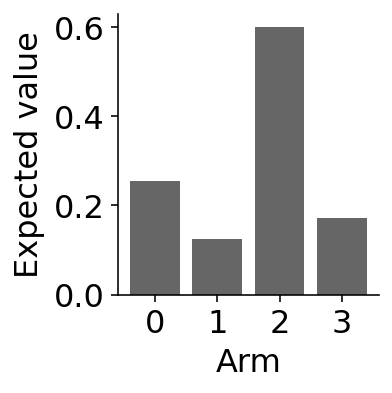

In [4]:
#Environment
# Shared env params
seed_value = 503

# Create env
env = BanditUniform4(p_min=0.1, p_max=0.3, p_best=0.6)
env.seed(seed_value)

# Plot env
plot_bandit(env, alpha=0.6) #graph of probability distribution of each arm

In [5]:
#Agents

#basic Q learning agent
exploit = BanditActorCritic(
    DeterministicActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

#egreedy agent
egreedy = BanditActorCritic(
    EpsilonActor(num_actions=env.num_arms, epsilon=0.2),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

#random agent (non Q learning)
ran = BanditActorCritic(
    RandomActor(num_actions=env.num_arms),
    Critic(num_inputs=env.num_arms, default_value=0.0)
)

# organize them
agents = [exploit, egreedy, ran]
names = ["exploit", "egreedy", "random"]
colors = ["blue", "purple", "green"]

## Section 1 - Sudden Change in Environment
In this section we want to understand how learning is impacted when a sudden change in an agent's environment occurs. We also want to see whether certain agents can better adapt to changes in their environment. First, we will examine how two Q learning agents (basic Q learning agent and egreedy agent) and a random agent perform in a static environment. That is, a 4-armed bandit task where the probabilities of reward are static throughout the task. Then, we will examine how these agents perform in an environment with a sudden change. That is, a 4-armed bandit task where the optimal arm suddenly becomes the least optimal arm after 100 steps. 

In [6]:
#static env
num_steps = 400
num_experiments = 400

# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

exploit:   0%|          | 0/400 [00:00<?, ?it/s]

egreedy:   0%|          | 0/400 [00:00<?, ?it/s]

random:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

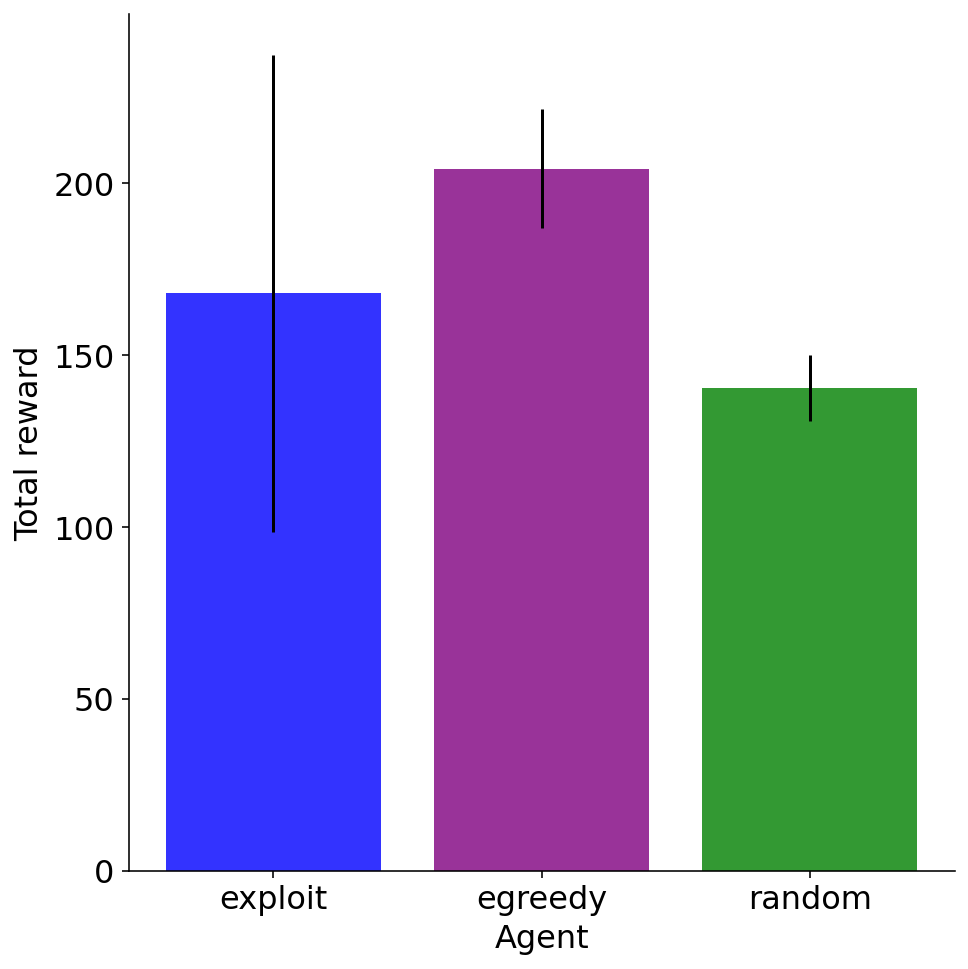

In [7]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(7, 7))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

###Plot

The above plot shows total reward gained by exploit agent, egreedy agent, and random agent. Egreedy had highest total amount of reward, followed by exploit, followed by random. Both Q learning agents outperformed the random agent, though the exploit agent did have a very high variability in reward. Out of the two Q learning agents, egreedy outperformed exploit and had a lot less variability in amount of reward acquired.

In [8]:
#sudden change in env; every 100 steps, optimal arm becomes works worst one
num_experiments = 400
num_steps = 100 * 4
num_change = 100
seed_value = 503

# Env
env = BanditChange4(num_change=num_change)
env.seed(seed_value)

[503]

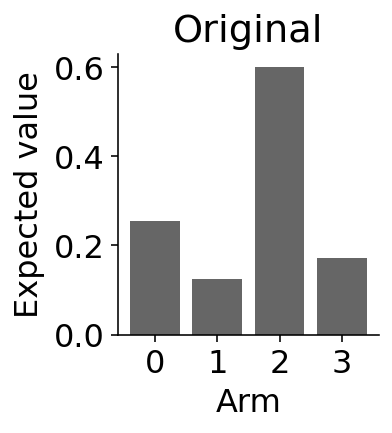

In [9]:
plot_bandit(env.orginal, alpha=0.6, title="Original")

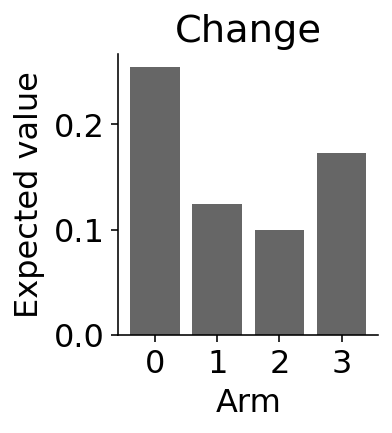

In [10]:
plot_bandit(env.change, alpha=0.6, title="Change")

In [11]:
# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

exploit:   0%|          | 0/400 [00:00<?, ?it/s]

egreedy:   0%|          | 0/400 [00:00<?, ?it/s]

random:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

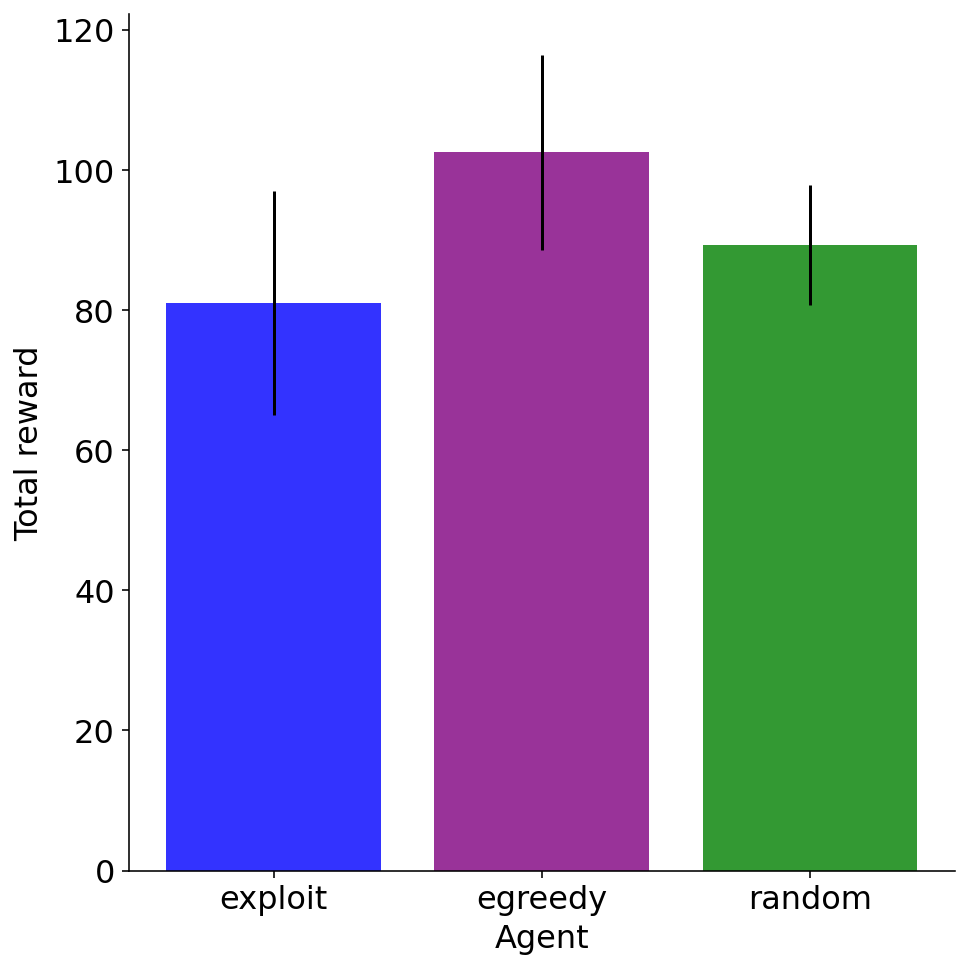

In [12]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(7, 7))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Plot

The above plot shows the total reward acquired by exploit agent, egreedy agent, and random agent when the environment experienced a sudden change 100 steps in. Egreedy obtained the highest amount of reward followed by random followed by exploit. Out of the two Q learning agents, only egreedy outperformed random, suggesting egreedy is better suited than exploit to adapt to sudden changes in its environment.

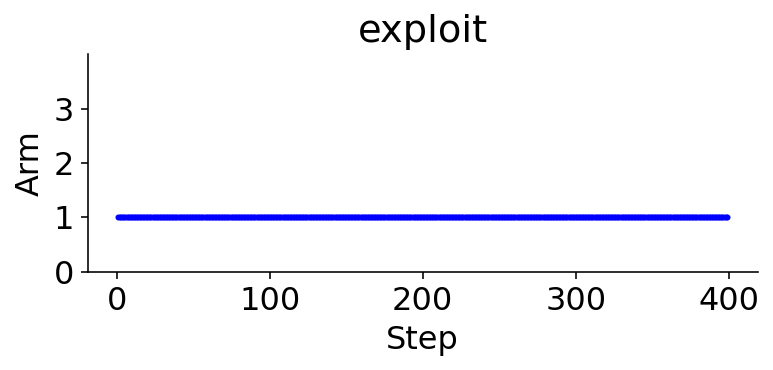

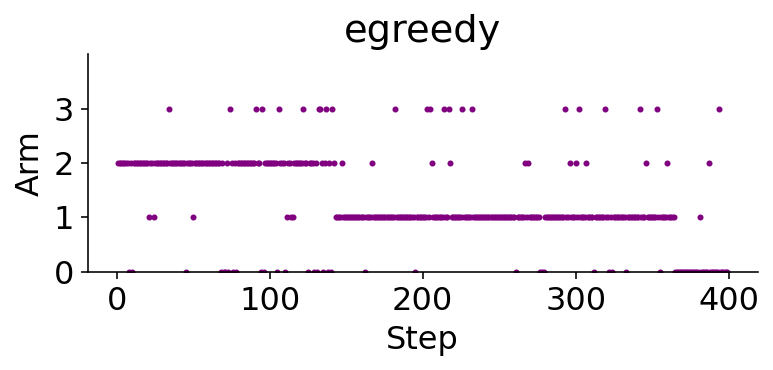

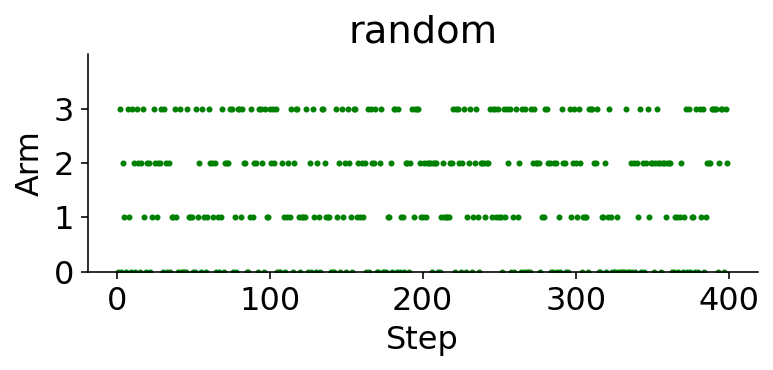

In [13]:
#plot of arm choice in one expt 
num_experiment = 10
for name, res, color in zip(names, results, colors):
    plot_bandit_actions(
        select_exp(res, num_experiment), 
        max_steps=num_steps,
        s=4,
        title=name, 
        color=color,
        figsize=(6,2)
    )

### Plot

This plot is showing the arm choices of the three agents during one experiment in the environment where a sudden change occurred. Exploit picked one arm at the beginning and stuck with that arm until the end, while egreedy switched from arm 2 to arm 1 after step 100 and also explored a bit outside of those two arms. Random sampled from each arm throughout the task. These arm choices help explain the findings from the previous plot -- because egreedy and random both switched arms throughout the experiments, they were able to adapt to a sudden change in their environment, while exploit, which only stuck with one arm, was not.

### Section Conclusions

Comparing between the total reward plots for the static environment and sudden change environment, we see that all three agents did not perform as well in the sudden change environment compared to the static environment (exploit, egreedy, random: 80, 100, 90 compared with 160, 200, 140 total reward acquired). However, certain agents were better suited toward adapting toward the sudden change environment. Specifically, the egreedy agent outperformed the other two agents in both the static and sudden change environment. Interestingly, the other Q learning agent, exploit, was only better than random in the static environment. The next section will explore whether the type of change occurring in the environment differentially impacts agent performance.

## Section 2 - Gradual Change in Environment
In this section we want to understand how learning is impacted when the agent's environment is gradually changing. A limitation of Q learning is that early learning heavily shapes future actions. Therefore, a basic Q learning agent may not be able to adapt to a sudden change in its environment that happens long after it has learned the optimal arm. However, an environment that is gradually changing might mean this limitation may not impact performance as much. We want to see whether the basic Q learning agent can better adapt to an environment that is gradually changing compared to the sudden change in the previous section. We also want to see whether certain agents can better adapt to changes in their environment. We will examine how two Q learning agents (basic Q learning agent and egreedy agent) and a random agent perform in two incrementally changing environments: one where the arm probabilities are initially fixed and then the optimal arm probability gradually decreases (exploit to explore transition) and one where the optimal arm probability is gradually decreasing and then goes back to its original probability (explore to exploit transition).

In [14]:
#gradual change in env where original arm probabilities for first 100 steps, then optimal arm decreases by set amount each step (exploit -> explore)
num_experiments = 400
num_steps = 100 * 4
num_change = 100
seed_value = 503

# Env
env = BanditGradualChange41(num_change=num_change)
env.seed(seed_value)

[503]

In [15]:
# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

exploit:   0%|          | 0/400 [00:00<?, ?it/s]

egreedy:   0%|          | 0/400 [00:00<?, ?it/s]

random:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

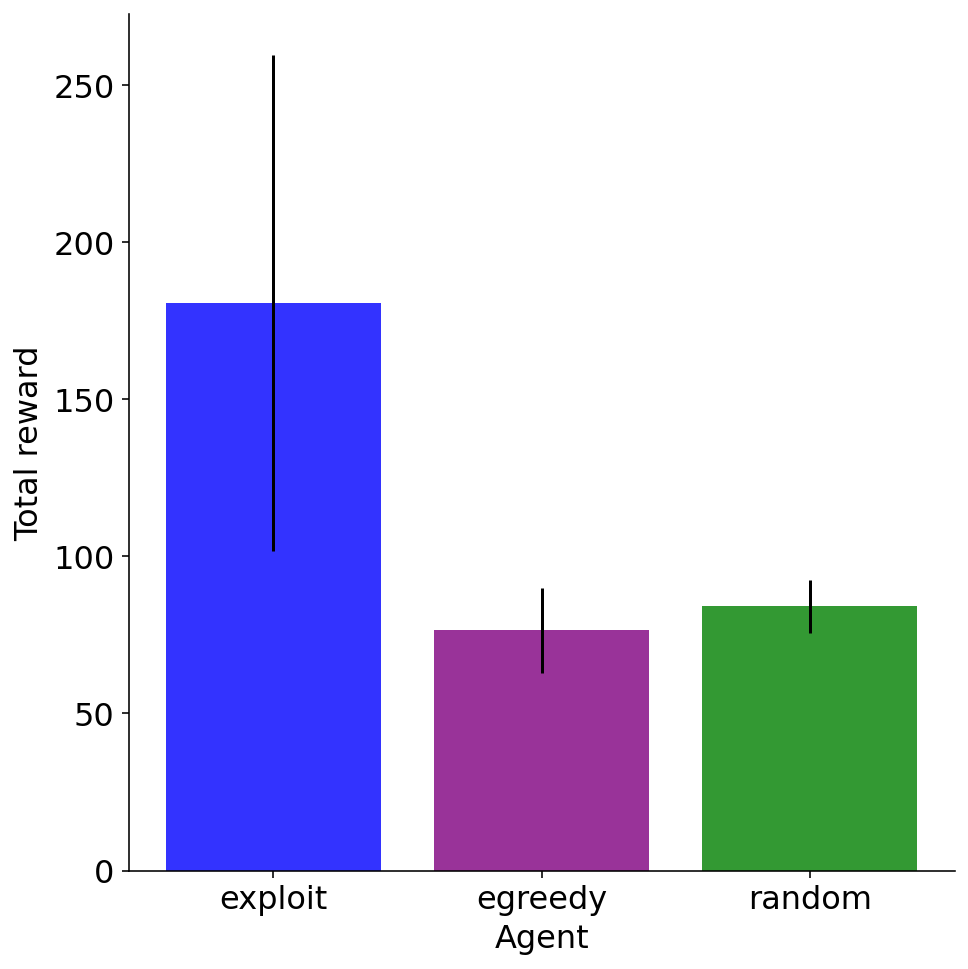

In [16]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(7, 7))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Plot

This plot is showing the total reward acquired by each agent where the reward probabilities of each arm are constant for the first 100 steps and afterwards the optimal arm probability decreases by 0.03 each step. Exploit obtained more reward than random (though it had very high variability) which obtained more than egreedy. Out of the two Q learning agents, only exploit performed better than random.

In [17]:
#gradual change in env where optimal arm decreasing by set amount each step for first 100 steps, then arms switch back to original probabilites
num_experiments = 400
num_steps = 100 * 4
num_change = 100
seed_value = 503

# Env
env = BanditGradualChange42(num_change=num_change)
env.seed(seed_value)

[503]

In [18]:
# !
results = []
for name, agent in zip(names, agents):
    log = experiment(
        f"{name}",
        agent,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=False,
    )
    results.append(log)

exploit:   0%|          | 0/400 [00:00<?, ?it/s]

egreedy:   0%|          | 0/400 [00:00<?, ?it/s]

random:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

total_reward:   0%|          | 0/400 [00:00<?, ?it/s]

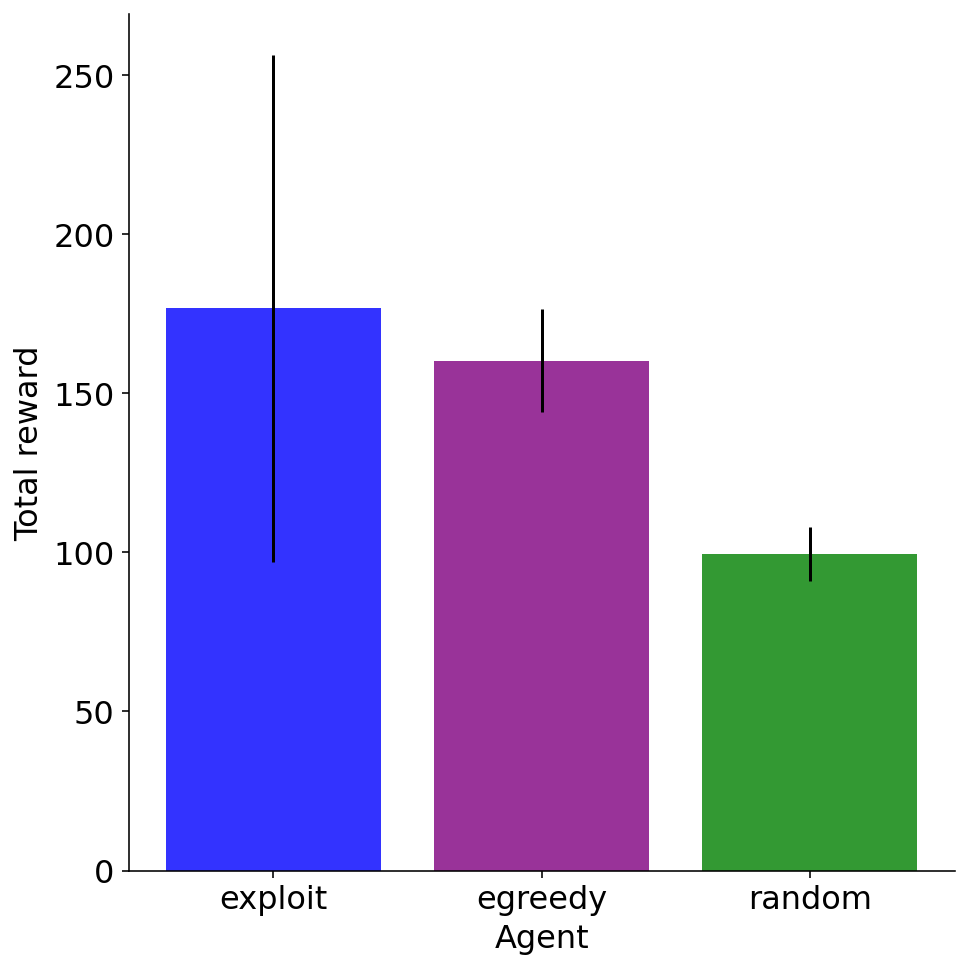

In [19]:
# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)   

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(7, 7))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.8)
plt.ylabel("Total reward")
plt.xlabel("Agent")
plt.tight_layout()
sns.despine()

### Plot

This plot is showing the total reward acquired by each agent when the optimal arm probability is decreasing by 0.03 for the first 100 runs and then goes back to its original value afterwards. Exploit performed better than egreedy which performed better than random. Both Q learning agents outperformed random, but exploit was the better agent out of the two Q learning agents.

### Section Conclusions

Comparing between the total reward plots for the gradually changing environments and the static environment, we see that the egreedy and random agents performed worse in the gradual environments compared to the static environment (egreedy, random: 70, 160; 80 and 100 compared to 160 and 140), while the exploit agent performed better in both gradually changing environments than it did in the static environment (180 and 170 compared to 160). This is in contrast to what was seen for its performance in the suddenly changing environment (where it performed worse than both other agents), suggesting it may be better suited for gradually changing environments than the other two agents.


## Conclusions
This project had two goals. First, we wanted to understand how a Q learning agent performed in a changing environment compared to a static environment. We had mixed evidence to support our hypotheses. While both the exploit and e-greedy agents performed worse in the suddenly changing environment than in the static environment (as predicted), the exploit agent performed better in both gradually changing environments than in static while the e-greedy agent performed worse or the same in the gradually changing environments as it did in the static one. As predicted, the exploit agent performed better in the gradually changing environments than in the suddenly changing one. Finally, the e-greedy agent did perform better in the second gradually changing environment than in the suddenly changing environment as predicted, but not in the first. To break down the results:

(in order: static, sudden, gradual 1, gradual 2) 
            
Exploit    160, 80, 180, 170

Egreedy    200, 100, 70, 160

Random     140, 90, 80, 100       

Second, we wanted to understand whether certain types of agents would perform better in different types of changing environments. We also had mixed evidence to support these hypotheses. Both Q learning agents performed better than random only in the static and gradual 2 environments. In the sudden environment, random performed better than exploit, while in the gradual 1 environment, random performed better than e-greedy. Additionally, while e-greedy performed better than exploit in the sudden change environment, it performed worse than exploit in both gradually changing environments. 

These findings suggest that current Q learning models are not suited to learn in changing environments. However, some agents are better suited than others to adapt to changing environments. Basic Q learning agents (Deterministic agent/exploit) are not suited for suddenly changing environments due to the heavy influence of early learning on future arm selection. In this environment, they performed worse than an agent choosing at random. However, the influence of early learning may be mitigated when the environment is gradually changing. In both examples of this environment, they outperformed both the e-greedy agent and the random agent. However, this may be due to the other two agents being in a greater disadvantage than the exploit agent in this environment, especially in the gradual 1 environment. Since exploit tends to stick to one arm the entire time, while the other two agents have some amount of random sampling, they are more likely to get the arm with a decreasing/very low probability of reward. Still, future Q learning models need to be designed to learn not only in static environments but in changing environments to serve as better tools to study human behavior.